In [1]:
from sklearn import linear_model
import pandas as pd
import numpy as np
import datetime
import math
import calendar

%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import style



In [2]:
stock = pd.read_csv("static/AAPL.csv")

In [3]:
stock.set_index("Date", inplace=True)

In [4]:
stock.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2016-09-09,104.639999,105.720001,103.129997,103.129997,98.307373,46557000
2016-09-12,102.650002,105.720001,102.529999,105.440002,100.509361,45292800
2016-09-13,107.510002,108.790001,107.239998,107.949997,102.901985,62176200
2016-09-14,108.730003,113.029999,108.599998,111.769997,106.543358,110888700
2016-09-15,113.860001,115.730003,113.489998,115.570000,110.165649,89983600


In [5]:
stock.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-09-03,206.429993,206.979996,204.220001,205.699997,205.699997,20023000
2019-09-04,208.389999,209.479996,207.320007,209.190002,209.190002,19188100
2019-09-05,212.000000,213.970001,211.509995,213.279999,213.279999,23913700
2019-09-06,214.050003,214.419998,212.509995,213.259995,213.259995,19362300
2019-09-09,214.839996,216.440002,211.070007,214.169998,214.169998,27295300


In [6]:
mavg = stock['Adj Close'].rolling(window=100).mean()

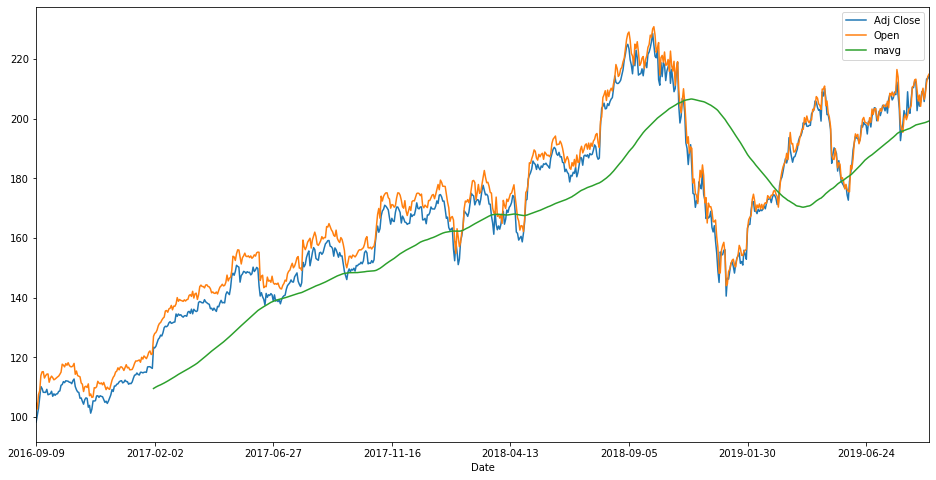

In [7]:
plt.figure(figsize=(16,8))
stock['Adj Close'].plot(label='Adj Close')
stock['Open'].plot(label='Open')
mavg.plot(label='mavg')
plt.legend()
plt.show()

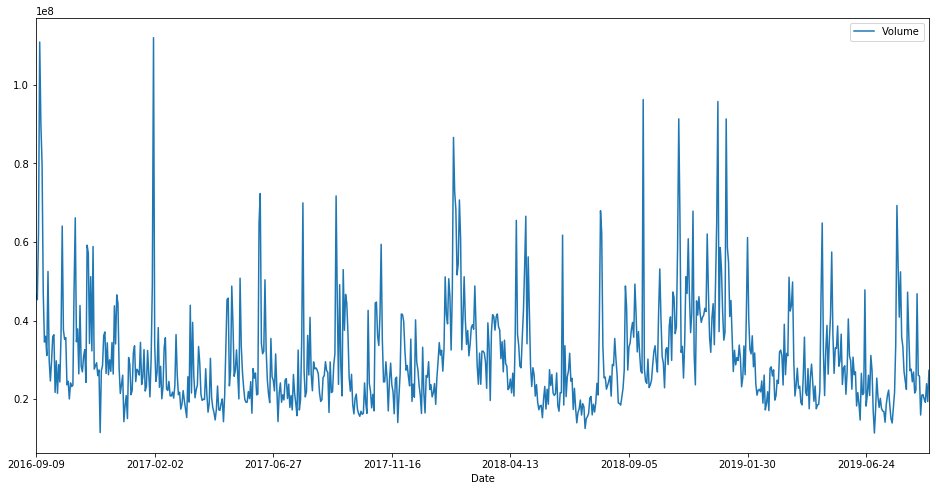

In [8]:
plt.figure(figsize=(16,8))
stock['Volume'].plot(label='Volume')
plt.legend()
plt.show()

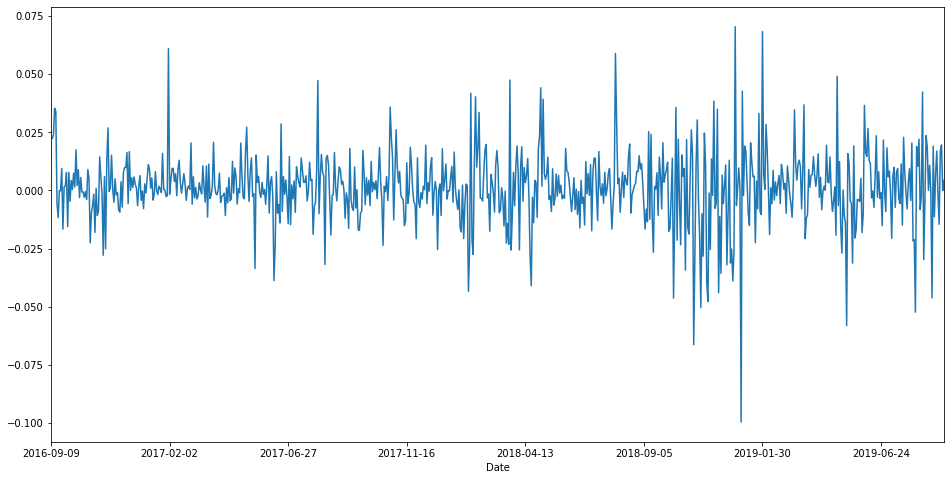

In [9]:
'''
Return Deviation — to determine risk and return
Expected Return measures the mean, or expected value, of the probability distribution of investment returns. The expected return of a portfolio is calculated by multiplying the weight of each asset by its expected return and adding the values for each investment — Investopedia.
Following is the formula you could refer to:

Formula for Returns   p(t)/p(t-1)-1
'''
plt.figure(figsize=(16,8))
rets = stock['Adj Close']/ stock['Adj Close'].shift(1) - 1
rets.plot(label='return')

In [10]:
dfreg = stock.loc[:,['Adj Close','Volume']]#new list with close and volume
dfreg['HL_PCT'] = (stock['High'] - stock['Low']) / stock['Close'] * 100.0
dfreg['PCT_change'] = (stock['Close'] - stock['Open']) / stock['Open'] * 100.0

In [11]:
dfreg.head()

,Adj Close,Volume,HL_PCT,PCT_change
Date,,,,
2016-09-09,98.307373,46557000,2.511397,-1.443045
2016-09-12,100.509361,45292800,3.025419,2.717974
2016-09-13,102.901985,62176200,1.435853,0.409260
2016-09-14,106.543358,110888700,3.963497,2.795911
2016-09-15,110.165649,89983600,1.938224,1.501843


In [12]:
dfreg.tail()

,Adj Close,Volume,HL_PCT,PCT_change
Date,,,,
2019-09-03,205.699997,20023000,1.341757,-0.353629
2019-09-04,209.190002,19188100,1.032549,0.383897
2019-09-05,213.279999,23913700,1.153416,0.603773
2019-09-06,213.259995,19362300,0.895622,-0.369076
2019-09-09,214.169998,27295300,2.507352,-0.311859


In [13]:
reg = linear_model.LinearRegression()
regRidge = linear_model.Ridge(alpha=.5)
regLasso = linear_model.Lasso(alpha=0.1)
from sklearn import preprocessing

In [14]:
# Drop missing value
dfreg.fillna(value=-99999, inplace=True)

In [15]:
# We want to separate 2 percent of the data to forecast(Prognose)of that amount of time
forecast_out = int(math.ceil(0.02 * len(dfreg)))
print(forecast_out)

16


In [16]:
# Separating the label here, we want to predict the AdjClose
forecast_col = 'Adj Close'
dfreg['label'] = dfreg[forecast_col].shift(-forecast_out)
x = np.array(dfreg.drop(['label'], 1))


In [17]:
# Scale the X so that everyone can have the same distribution for linear regression
#dfreg['label'] = preprocessing.scale(dfreg['label'])

In [18]:
dfreg.tail()

,Adj Close,Volume,HL_PCT,PCT_change,label
Date,,,,,
2019-09-03,205.699997,20023000,1.341757,-0.353629,NaN
2019-09-04,209.190002,19188100,1.032549,0.383897,NaN
2019-09-05,213.279999,23913700,1.153416,0.603773,NaN
2019-09-06,213.259995,19362300,0.895622,-0.369076,NaN
2019-09-09,214.169998,27295300,2.507352,-0.311859,NaN


In [19]:
# Finally We want to find Data Series of late X and early X (train) for model generation and evaluation
x_lately = dfreg[-forecast_out:].drop(columns=['label'])  #testx can not test just predict 
x = dfreg[:-forecast_out].drop(columns=['label'])         #trainx

In [20]:
x_lately.tail()

,Adj Close,Volume,HL_PCT,PCT_change
Date,,,,
2019-09-03,205.699997,20023000,1.341757,-0.353629
2019-09-04,209.190002,19188100,1.032549,0.383897
2019-09-05,213.279999,23913700,1.153416,0.603773
2019-09-06,213.259995,19362300,0.895622,-0.369076
2019-09-09,214.169998,27295300,2.507352,-0.311859


In [21]:
# Separate label and identify it as y
y = pd.DataFrame(dfreg['label'])
y = y[:-forecast_out]         #trainyData 

In [22]:
forecast_out=30
x_train, x_test = x[:-forecast_out], x[-forecast_out:]    #seperation of train and test
y_train, y_test = y[:-forecast_out], y[-forecast_out:] 

print(len(x_train))
print(len(y_train))
print(len(x_test))
print(len(y_test))

708
708
30
30


In [23]:
x_train.head()

,Adj Close,Volume,HL_PCT,PCT_change
Date,,,,
2016-09-09,98.307373,46557000,2.511397,-1.443045
2016-09-12,100.509361,45292800,3.025419,2.717974
2016-09-13,102.901985,62176200,1.435853,0.409260
2016-09-14,106.543358,110888700,3.963497,2.795911
2016-09-15,110.165649,89983600,1.938224,1.501843


In [24]:
y_train.tail()

,label
Date,
2019-06-27,206.435654
2019-06-28,208.049515
2019-07-01,207.880173
2019-07-02,206.236420
2019-07-03,206.953690


In [25]:
# Linear regression
reg.fit(x_train, y_train)

# Ridge Regression
regRidge.fit(x_train, y_train)

# Lasso
regLasso.fit(x_train, y_train);

In [26]:
confidencereg = reg.score(x_test, y_test)
confidenceRidge = regRidge.score(x_test, y_test)
confidenceLasso = regLasso.score(x_test, y_test)
print(confidencereg)
print(confidenceRidge)
print(confidenceLasso)

-1.089150861067508
-1.089102431577353
-1.058805593943804


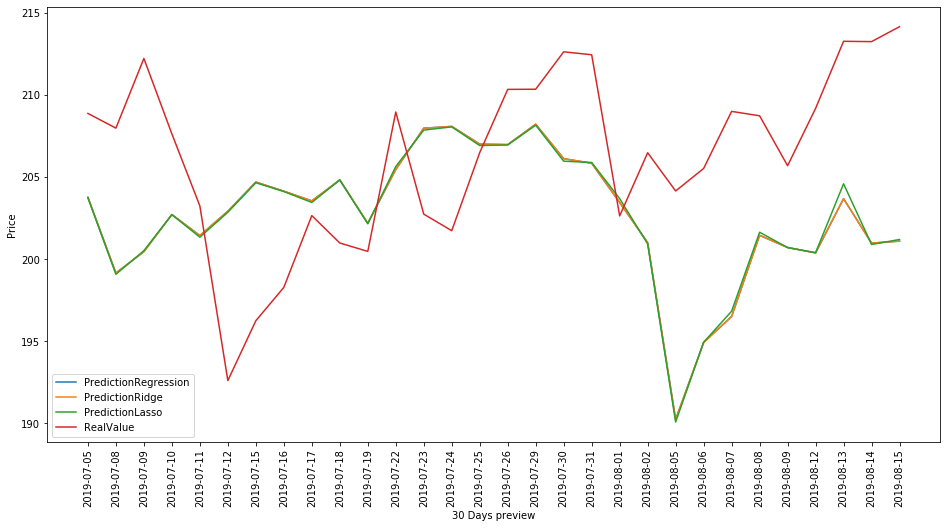

In [27]:
predictionreg = reg.predict(x_test)
predictionregRidge = regRidge.predict(x_test)
predictionregLasso = regLasso.predict(x_test)

plt.figure(figsize=(16,8))

plt.plot(predictionreg)
plt.plot(predictionregRidge)
plt.plot(predictionregLasso)

plt.plot(y_test)
plt.xlabel('{} Days preview'.format(len(y_test)))
plt.ylabel('Price')
plt.xticks(rotation=90)
plt.legend(labels=["PredictionRegression","PredictionRidge","PredictionLasso", "RealValue"])
plt.show();

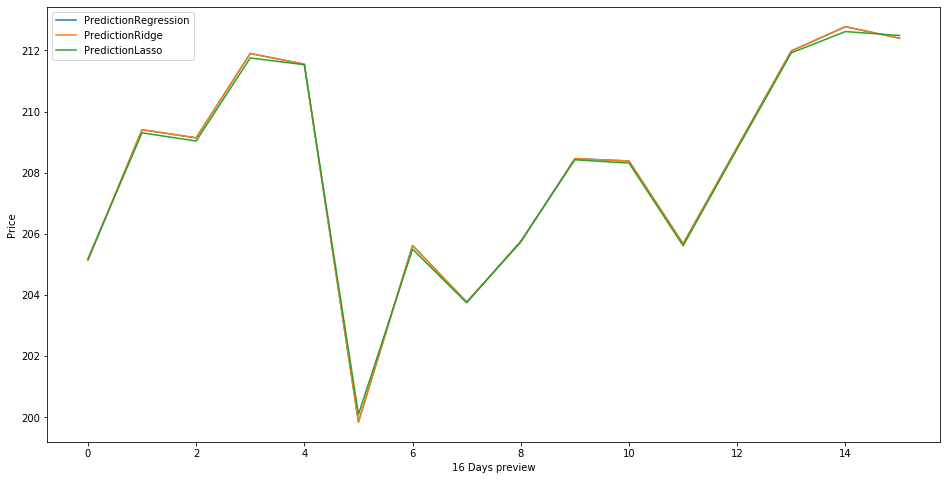

In [28]:

predictionreg = reg.predict(x_lately)
predictionregRidge = regRidge.predict(x_lately)
predictionregLasso = regLasso.predict(x_lately)

plt.figure(figsize=(16,8))
plt.plot(predictionreg)
plt.plot(predictionregRidge)
plt.plot(predictionregLasso)
plt.xlabel('{} Days preview'.format(len(x_lately)))
plt.ylabel('Price')
plt.legend(labels=["PredictionRegression","PredictionRidge","PredictionLasso"]);